In [1]:
#Q1

/tmp/ipykernel_96/1051973768.py:29: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio_tau = joint_density(theta[c, g-1], tau_star) / joint_density(theta[c, g-1], tau[c, g-1])
/tmp/ipykernel_96/1051973768.py:37: RuntimeWarning: invalid value encountered in scalar divide
  acceptance_ratio_theta = joint_density(theta_star, tau[c, g]) / joint_density(theta[c, g-1], tau[c, g])


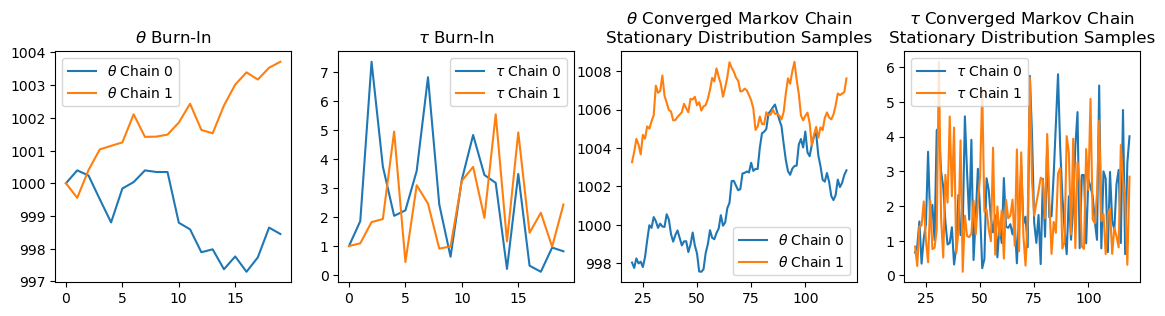

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

n = 30   
x = stats.norm(loc=0, scale=1).rvs(size=n)
C, G = 2, 10000  
theta = np.zeros([C, G])  
tau = np.zeros([C, G])    

theta[:, 0] = 1000 
tau[:, 0] = 1  

def propose_tau():
    return stats.gamma(a=2, scale=1).rvs()  

def propose_theta(current_theta):
    return stats.norm(loc=current_theta, scale=0.5).rvs()


def joint_density(theta, tau):
    likelihood = np.prod(stats.norm(loc=theta, scale=1/np.sqrt(tau)).pdf(x))
    return likelihood  


for c in range(C):
    for g in range(1, G):
        tau_star = propose_tau()
        acceptance_ratio_tau = joint_density(theta[c, g-1], tau_star) / joint_density(theta[c, g-1], tau[c, g-1])
        if np.random.rand() < min(1, acceptance_ratio_tau):
            tau[c, g] = tau_star
        else:
            tau[c, g] = tau[c, g-1]
        
        # Propose new theta
        theta_star = propose_theta(theta[c, g-1])
        acceptance_ratio_theta = joint_density(theta_star, tau[c, g]) / joint_density(theta[c, g-1], tau[c, g])
        if np.random.rand() < min(1, acceptance_ratio_theta):
            theta[c, g] = theta_star
        else:
            theta[c, g] = theta[c, g-1]


fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

burn = 20  
demo = 120 

for c in range(C):
    ax[0].plot(theta[c, :burn], label="$\\theta$ Chain " + str(c))
    ax[1].plot(tau[c, :burn], label="$\\tau$ Chain " + str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label="$\\theta$ Chain " + str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label="$\\tau$ Chain " + str(c))

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

In [3]:
#Q2

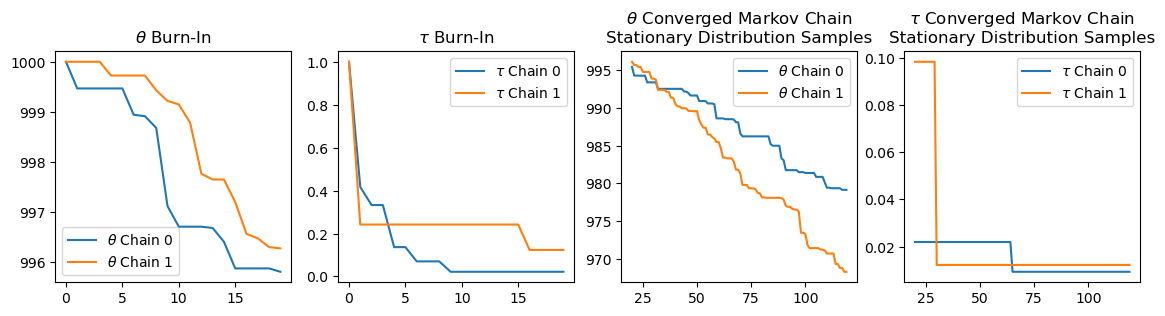

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

n = 30
x = stats.norm(loc=0, scale=1).rvs(size=n)
C, G = 2, 10000  
theta = np.zeros([C, G])  
tau = np.zeros([C, G])  
theta[:, 0] = 1000  
tau[:, 0] = 1  


def joint_log_prob(theta, tau, x):
    likelihood = np.sum(stats.norm(loc=theta, scale=1/np.sqrt(tau)).logpdf(x))
    prior_theta = stats.laplace(0, 10).logpdf(theta) 
    prior_tau = stats.expon(scale=1).logpdf(tau)  
    return likelihood + prior_theta + prior_tau

for c in range(C):
    for g in range(1, G):

        tau_t_minus_1 = tau[c, g-1]
        a, b = -tau_t_minus_1, np.inf
        tau_proposal = stats.truncnorm(a, b, loc=tau_t_minus_1, scale=1).rvs()
        log_acceptance_tau = joint_log_prob(theta[c, g-1], tau_proposal, x) - joint_log_prob(theta[c, g-1], tau[c, g-1], x)
        if np.log(stats.uniform().rvs()) < log_acceptance_tau:
            tau[c, g] = tau_proposal
        else:
            tau[c, g] = tau[c, g-1]
        theta_proposal = stats.laplace(loc=theta[c, g-1], scale=0.5).rvs()
        log_acceptance_theta = joint_log_prob(theta_proposal, tau[c, g], x) - joint_log_prob(theta[c, g-1], tau[c, g], x)
        if np.log(stats.uniform().rvs()) < log_acceptance_theta:
            theta[c, g] = theta_proposal
        else:
            theta[c, g] = theta[c, g-1]


fig, ax = plt.subplots(1, 4, figsize=(14, 3))
ax[0].set_title("$\\theta$ Burn-In")
ax[1].set_title("$\\tau$ Burn-In")
ax[2].set_title("$\\theta$ Converged Markov Chain\nStationary Distribution Samples")
ax[3].set_title("$\\tau$ Converged Markov Chain\nStationary Distribution Samples")

burn = 20  
demo = 120 

for c in range(C):
    ax[0].plot(theta[c, :burn], label="$\\theta$ Chain " + str(c))
    ax[1].plot(tau[c, :burn], label="$\\tau$ Chain " + str(c))
    ax[2].plot(np.arange(burn, demo, dtype=int), theta[c, burn:demo], label="$\\theta$ Chain " + str(c))
    ax[3].plot(np.arange(burn, demo, dtype=int), tau[c, burn:demo], label="$\\tau$ Chain " + str(c))

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
plt.show()

In [ ]:
# Metropolis Hastings within Gibbs do not need to derive full conditionals explicitly, the lack of analytically determining the full conditional distributions when performing Gibbs sampling will make the model more accurate.